# <br>--------------------------------------------------------------------------------------------------------
# ___**Predict the Criminals**___


This Python data Science project is based on the <a href="https://www.hackerearth.com/challenge/competitive/predict-the-criminal/">Predict the Criminals</a> challenge organised by <a href ="https://www.hackerearth.com"> HackerEarth</a>. As obvious from the name the main task of the challenge was to predict the criminals from given dataset with high accuracy.
<br>


<img src=https://media.tenor.com/images/4705bf0c57ab7059bc52852e637d337b/tenor.gif width="800" border="10">

     source: Google


<br>

As given at the challenge site(<a href="https://www.hackerearth.com/challenge/competitive/predict-the-criminal/">Predict the Criminals</a>) the description of the problem is as below.
<br>



**Problem Description:** 
> *"There has been a surge in crimes committed in recent years, making crime a top cause of concern for law enforcement. If we are able to estimate whether someone is going to commit a crime in the future, we can take precautions and be prepared."* 

You are given a dataset containing answers to various questions concerning the professional and private lives of several people. A few of them have been arrested for various small and large crimes in the past.
Use the given data to predict if the people in the test data will commit a crime. The **train data** consists of <code>45718 rows</code>, while the **test data** consists of <code>11430 rows</code>.

<br>
Now I'm going to import all important libraries in the below code cell.
## Importing libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from tqdm import tqdm_notebook

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#import xgboost 
from lightgbm import LGBMClassifier
from mlxtend.classifier import EnsembleVoteClassifier



#Metrices
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_score


<br>
## Getting the Data

Source: [HackerEarth(Predict The Criminal Challenge)](https://www.hackerearth.com/problem/machine-learning/predict-the-criminal/) 


<img src=https://media1.tenor.com/images/d689a426cfe26f5155ee8e400dc699ee/tenor.gif?itemid=5739993 width="600">

After importing the criminal_train.csv file and criminal_test.csv file, I'm combining them so to carry out operation simultaneosly on both files in further steps of data wrangling.

In [2]:
train_df = pd.read_csv('criminal_train.csv')
test_df = pd.read_csv('criminal_test.csv')
combine = [train_df, test_df] 
data = pd.concat(combine)

<br>
<br>
## Data Analysis

Let's see the what are the features columns present in dataset files. 

In [3]:
print(train_df.columns)


Index(['PERID', 'IFATHER', 'NRCH17_2', 'IRHHSIZ2', 'IIHHSIZ2', 'IRKI17_2',
       'IIKI17_2', 'IRHH65_2', 'IIHH65_2', 'PRXRETRY', 'PRXYDATA', 'MEDICARE',
       'CAIDCHIP', 'CHAMPUS', 'PRVHLTIN', 'GRPHLTIN', 'HLTINNOS', 'HLCNOTYR',
       'HLCNOTMO', 'HLCLAST', 'HLLOSRSN', 'HLNVCOST', 'HLNVOFFR', 'HLNVREF',
       'HLNVNEED', 'HLNVSOR', 'IRMCDCHP', 'IIMCDCHP', 'IRMEDICR', 'IIMEDICR',
       'IRCHMPUS', 'IICHMPUS', 'IRPRVHLT', 'IIPRVHLT', 'IROTHHLT', 'IIOTHHLT',
       'HLCALLFG', 'HLCALL99', 'ANYHLTI2', 'IRINSUR4', 'IIINSUR4', 'OTHINS',
       'CELLNOTCL', 'CELLWRKNG', 'IRFAMSOC', 'IIFAMSOC', 'IRFAMSSI',
       'IIFAMSSI', 'IRFSTAMP', 'IIFSTAMP', 'IRFAMPMT', 'IIFAMPMT', 'IRFAMSVC',
       'IIFAMSVC', 'IRWELMOS', 'IIWELMOS', 'IRPINC3', 'IRFAMIN3', 'IIPINC3',
       'IIFAMIN3', 'GOVTPROG', 'POVERTY3', 'TOOLONG', 'TROUBUND', 'PDEN10',
       'COUTYP2', 'MAIIN102', 'AIIND102', 'ANALWT_C', 'VESTR', 'VEREP',
       'Criminal'],
      dtype='object')


<br>
***
**Description of features present in data**

Variable Name |  Description     
:---------------|:--------------
1. ** PERID **  |  Person  ID   
2. ** IFATHER **  |  FATHER  IN  HOUSEHOLD   
3. ** NRCH17_2 **  |  RECODED  #  R's  CHILDREN  <  18  IN  HOUSEHOLD   
4. ** IRHHSIZ2 **  |  RECODE  -  IMPUTATION-REVISED  #  PERSONS  IN  HH   
5. ** IIHHSIZ2 **  |  IMPUTATION  INDICATOR   
6. ** IRKI17_2 **  |  IMPUTATION-REVISED  #  KIDS  AGED<18  IN  HH   
7. ** IIKI17_2 **  |  IRKI17_2-IMPUTATION  INDICATOR   
8. ** IRHH65_2 **  |  REC  -  IMPUTATION-REVISED  #  OF  PER  IN  HH  AGED>=65   
9. ** IIHH65_2 **  |  IRHH65_2-IMPUTATION  INDICATOR   
10. ** PRXRETRY **  |  SELECTED  PROXY  UNAVAILABLE,  OTHER  PROXY  AVAILABLE?   
11. ** PRXYDATA **  |  IS  PROXY  ANSWERING  INSURANCE/INCOME  QS   
12. ** MEDICARE **  |  COVERED  BY  MEDICARE   
13. ** CAIDCHIP **  |  COVERED  BY  MEDICAID/CHIP   
14. ** CHAMPUS **  |  COV  BY  TRICARE,  CHAMPUS,  CHAMPVA,  VA,  MILITARY   
15. ** PRVHLTIN **  |  COVERED  BY  PRIVATE  INSURANCE   
16. ** GRPHLTIN **  |  PRIVATE  PLAN  OFFERED  THROUGH  EMPLOYER  OR  UNION   
17. ** HLTINNOS **  |  COVERED  BY  HEALTH  INSUR   
18. ** HLCNOTYR **  |  ANYTIME  DID  NOT  HAVE  HEALTH  INS/COVER  PAST  12  MOS   
19. ** HLCNOTMO **  |  PAST  12  MOS,  HOW  MANY  MOS  W/O  COVERAGE   
20. ** HLCLAST **  |  TIME  SINCE  LAST  HAD  HEALTH  CARE  COVERAGE   
21. ** HLLOSRSN **  |  MAIN  REASON  STOPPED  COVERED  BY  HEALTH  INSURANCE   
22. ** HLNVCOST **  |  COST  TOO  HIGH   
23. ** HLNVOFFR **  |  EMPLOYER  DOESN'T  OFFER   
24. ** HLNVREF **  |  INSURANCE  COMPANY  REFUSED  COVERAGE   
25. ** HLNVNEED **  |  DON'T  NEED  IT   
26. ** HLNVSOR **  |  NEVER  HAD  HLTH  INS  SOME  OTHER  REASON   
27. ** IRMCDCHP **  |  IMPUTATION  REVISED  CAIDCHIP   
28. ** IIMCDCHP **  |  MEDICAID/CHIP  -  IMPUTATION  INDICATOR   
29. ** IRMEDICR **  |  MEDICARE  -  IMPUTATION  REVISED   
30. ** IIMEDICR **  |  MEDICARE  -  IMPUTATION  INDICATOR   
31. ** IRCHMPUS **  |  CHAMPUS  -  IMPUTATION  REVISED   
32. ** IICHMPUS **  |  CHAMPUS  -  IMPUTATION  INDICATOR   
33. ** IRPRVHLT **  |  PRIVATE  HEALTH  INSURANCE  -  IMPUTATION  REVISED   
34. ** IIPRVHLT **  |  PRIVATE  HEALTH  INSURANCE  -  IMPUTATION  INDICATOR   
35. ** IROTHHLT **  |  OTHER  HEALTH  INSURANCE  -  IMPUTATION  REVISED   
36. ** IIOTHHLT **  |  OTHER  HEALTH  INSURANCE  -  IMPUTATION  INDICATOR   
37. ** HLCALLFG **  |  FLAG  IF  EVERY  FORM  OF  HEALTH  INS  REPORTED   
38. ** HLCALL99 **  |  YES  TO  MEDICARE/MEDICAID/CHAMPUS/PRVHLTIN   
39. ** ANYHLTI2 **  |  COVERED  BY  ANY  HEALTH  INSURANCE  -  RECODE   
40. ** IRINSUR4 **  |  RC-OVERALL  HEALTH  INSURANCE  -  IMPUTATION  REVISED   
41. ** IIINSUR4 **  |  RC-OVERALL  HEALTH  INSURANCE  -  IMPUTATION  INDICATOR   
42. ** OTHINS **  |  RC-OTHER  HEALTH  INSURANCE   
43. ** CELLNOTCL **  |  NOT  A  CELL  PHONE   
44. ** CELLWRKNG **  |  WORKING  CELL  PHONE   
45. ** IRFAMSOC **  |  FAM  RECEIVE  SS  OR  RR  PAYMENTS  -  IMPUTATION  REVISED   
46. ** IIFAMSOC **  |  FAM  RECEIVE  SS  OR  RR  PAYMENTS  -  IMPUTATION  INDICATOR   
47. ** IRFAMSSI **  |  FAM  RECEIVE  SSI  -  IMPUTATION  REVISED   
48. ** IIFAMSSI **  |  FAM  RECEIVE  SSI  -  IMPUTATION  INDICATOR   
49. ** IRFSTAMP **  |  RESP/OTH  FAM  MEM  REC  FOOD  STAMPS  -  IMPUTATION  REVISED   
50. ** IIFSTAMP **  |  RESP/OTH  FAM  MEM  REC  FOOD  STAMPS  -  IMPUTATION  INDICATOR   
51. ** IRFAMPMT **  |  FAM  RECEIVE  PUBLIC  ASSIST  -  IMPUTATION  REVISED   
52. ** IIFAMPMT **  |  FAM  RECEIVE  PUBLIC  ASSIST  -  IMPUTATION  INDICATOR   
53. ** IRFAMSVC **  |  FAM  REC  WELFARE/JOB  PL/CHILDCARE  -  IMPUTATION  REVISED   
54. ** IIFAMSVC **  |  FAM  REC  WELFARE/JOB  PL/CHILDCARE  -  IMPUTATION  INDICATOR   
55. ** IRWELMOS **  |  IMP.  REVISED  -  NO.OF  MONTHS  ON  WELFARE   
56. ** IIWELMOS **  |  NO  OF  MONTHS  ON  WELFARE  -  IMPUTATION  INDICATOR   
57. ** IRPINC3 **  |  RESP  TOT  INCOME  (FINER  CAT)  -  IMP  REV   
58. ** IRFAMIN3 **  |  RECODE  -  IMP.REVISED  -  TOT  FAM  INCOME   
59. ** IIPINC3 **  |  RESP  TOT  INCOME  (FINER  CAT)  -  IMP  INDIC   
60. ** IIFAMIN3 **  |  IRFAMIN3  -  IMPUTATION  INDICATOR   
61. ** GOVTPROG **  |  RC-PARTICIPATED  IN  ONE  OR  MORE  GOVT  ASSIST  PROGRAMS   
62. ** POVERTY3 **  |  RC-POVERTY  LEVEL   
63. ** TOOLONG **  |  RESP  SAID  INTERVIEW  WAS  TOO  LONG   
64. ** TROUBUND **  |  DID  RESP  HAVE  TROUBLE  UNDERSTANDING  INTERVIEW   
65. ** PDEN10 **  |  POPULATION  DENSITY  2010   
66. ** COUTYP2 **  |  COUNTY  METRO/NONMETRO  STATUS   
67. ** MAIIN102 **  |  MAJORITY  AMER  INDIAN  AREA  INDICATOR  FOR  SEGMENT   
68. ** AIIND102 **  |  AMER  INDIAN  AREA  INDICATOR   
69. ** ANALWT_C **  |  FIN  PRSN-LEVEL  SIMPLE  WGHT   
70. ** VESTR **  |  ANALYSIS  STRATUM   
71. ** VEREP **  |  ANALYSIS  REPLICATE   
72. ** Criminal **  |  Target  Variable 

## Using Heatmap To See NaN Values

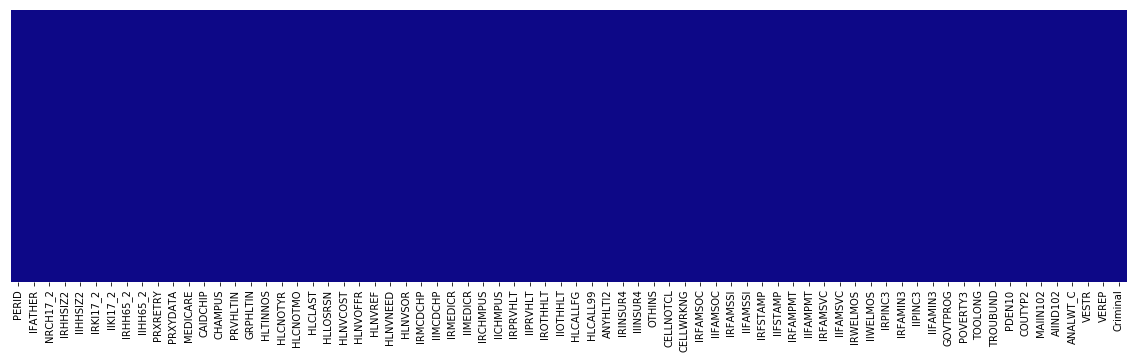

In [4]:
plt.figure(figsize = (20,5))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

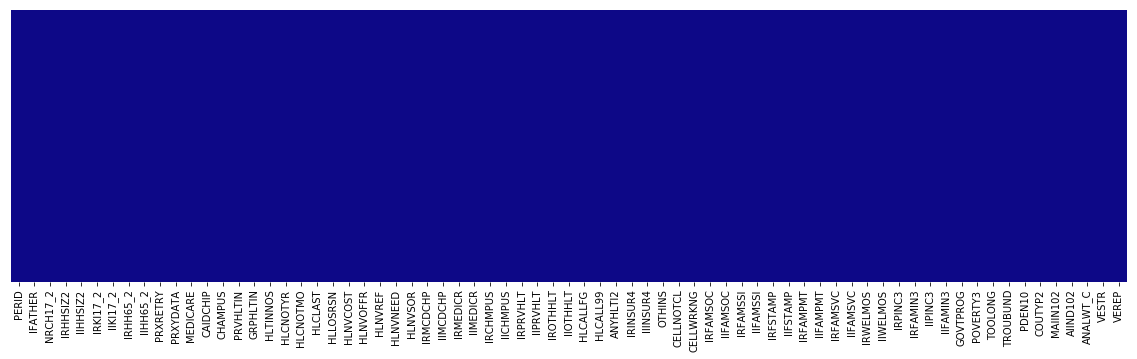

In [5]:
plt.figure(figsize = (20,5))
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

### From above we can see that none of train_df and test _df contains any nan value

## Variations in Criminal labels

Text(0.5,1,'The variation in target labels ')

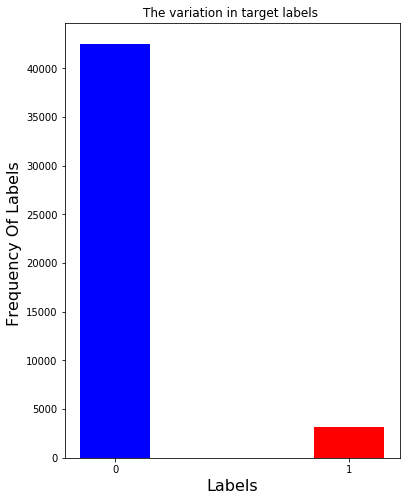

In [6]:
plt.figure(figsize = (6,8))

xvals = ['0', '1']
yvals = [len(train_df[train_df['Criminal'] == 0 ]), len(train_df[train_df['Criminal'] == 1 ])]

plt.bar(xvals, yvals, width = 0.3, color = ['blue', 'red'])
plt.xlabel('Labels', fontdict = {'size': '16'})
plt.ylabel('Frequency Of Labels ', fontdict = {'size': '16'})
plt.title('The variation in target labels ')


In [7]:
print(len((train_df[train_df['Criminal'] == 0 ])))

42543


## Scaling columns that are large having float value

In [8]:
train_df.columns[train_df.dtypes== 'float64']

Index(['ANALWT_C'], dtype='object')

In [9]:
train_df['ANALWT_C'].describe()

count     45718.000000
mean       4692.661179
std        5724.659486
min          -1.000000
25%        1252.396472
50%        2719.335160
75%        5765.810794
max      109100.623000
Name: ANALWT_C, dtype: float64

In [10]:
scale = MinMaxScaler()

In [11]:
train_df['ANALWT_C_scaled'] = scale.fit_transform(train_df[['ANALWT_C']])
test_df['ANALWT_C_scaled'] = scale.transform(test_df[['ANALWT_C']])

In [12]:
#let's check values of ANALWT_C_scaled
test_df['ANALWT_C_scaled'].head()

0    0.149840
1    0.027588
2    0.002456
3    0.049384
4    0.001599
Name: ANALWT_C_scaled, dtype: float64

# Data Cleaning 

## For Duplicate Columns

In [13]:

train_enc = pd.DataFrame(index= train_df.index)

for col in tqdm_notebook(train_df.columns):
    train_enc[col] = train_df[col].factorize()[0]

dup_col = {}

for i, c1 in enumerate(tqdm_notebook(train_enc.columns)):
    for c2 in train_enc.columns[i+1 :]:
        if c2 not in dup_col and np.all(train_enc[c1] == train_enc[c2]):
            dup_col[c2]=c1

A Jupyter Widget

A Jupyter Widget

In [14]:
dup_col

{'ANALWT_C_scaled': 'ANALWT_C', 'HLCALL99': 'HLCALLFG'}

## Removing Duplicate Column

In [15]:
train_df.drop("HLCALL99",axis=1,inplace=True)
test_df.drop("HLCALL99",axis=1, inplace=True)

In [16]:
# removing the id column as it is not required.
train_df.drop("PERID",axis=1,inplace=True)
test_df.drop("PERID", axis = 1, inplace = True)

In [17]:
#removing coulmn ANALWT_C 

train_df.drop('ANALWT_C', axis =1, inplace = True)
test_df.drop('ANALWT_C', axis =1, inplace = True)

In [18]:
train_df.shape

(45718, 70)

In [19]:
test_df.shape

(11430, 69)

# Model Validation

## Choosing Predictors 

In [23]:
Criminal_Predictors = ['IFATHER', 'NRCH17_2', 'IRHHSIZ2', 'IIHHSIZ2', 'IRKI17_2', 'IIKI17_2','IRHH65_2', 'IIHH65_2', 'PRXRETRY', 'PRXYDATA', 'MEDICARE', 'CAIDCHIP',
       'CHAMPUS', 'PRVHLTIN', 'GRPHLTIN', 'HLTINNOS', 'HLCNOTYR', 'HLCNOTMO','HLCLAST', 'HLLOSRSN', 'HLNVCOST', 'HLNVOFFR', 'HLNVREF', 'HLNVNEED',
       'HLNVSOR', 'IRMCDCHP', 'IIMCDCHP', 'IRMEDICR', 'IIMEDICR', 'IRCHMPUS','IICHMPUS', 'IRPRVHLT', 'IIPRVHLT', 'IROTHHLT', 'IIOTHHLT', 'HLCALLFG',
       'ANYHLTI2', 'IRINSUR4', 'IIINSUR4', 'OTHINS', 'CELLNOTCL', 'CELLWRKNG','IRFAMSOC', 'IIFAMSOC', 'IRFAMSSI', 'IIFAMSSI', 'IRFSTAMP', 'IIFSTAMP',
       'IRFAMPMT', 'IIFAMPMT', 'IRFAMSVC', 'IIFAMSVC', 'IRWELMOS', 'IIWELMOS','IRPINC3', 'IRFAMIN3', 'IIPINC3', 'IIFAMIN3', 'GOVTPROG', 'POVERTY3',
       'TOOLONG', 'TROUBUND', 'PDEN10', 'COUTYP2', 'MAIIN102', 'AIIND102', 'ANALWT_C_scaled','VESTR', 'VEREP']

In [24]:
train_X = train_df[Criminal_Predictors] 

In [25]:
len(train_X)

45718

In [26]:
test_X = test_df[Criminal_Predictors]


### Applying scaling on data frame

In [27]:
Scaler = MinMaxScaler()

In [28]:
train_X_scaled = Scaler.fit_transform(train_X)


In [29]:
test_X_scaled = Scaler.transform(test_X) 

## Target Value

In [30]:

Y = train_df['Criminal']

## Machine Learning  Models

In [33]:
Naive_Bayes = GaussianNB() 

DecisionTree = DecisionTreeClassifier()

RandomForest = RandomForestClassifier(random_state=0)

GradientBoosting = GradientBoostingClassifier(n_estimators=197, random_state=0)

LGBM = LGBMClassifier(objective='binary',random_state=0)

Neural_Network  = MLPClassifier(random_state=0)

Support_Vector_Machine =  SVC(random_state=0)

K_Neighbour_Classifier =  KNeighborsClassifier()

Logistic_Regression = LogisticRegression() 

## Training Each Model And Finding There Cross Validation Score  



In [ ]:

print('5-fold cross validation:\n')

labels = ['Naive Bayes Classifier', 'Logistic Regression Classifier', 'Decision Tree Classifier',  'Random Forest Classifier', 'Gradient Boosting Classifier',\
          'LightGBM Classifier', 'Neural Network Classifier','Support_Vector_Machine', 'K Neighbors Classifier']

for clf, label in zip([Naive_Bayes, Logistic_Regression, DecisionTree, RandomForest, GradientBoosting, LGBM, Neural_Network,   SVC(random_state=0),  K_Neighbour_Classifier ], labels):

    scores = model_selection.cross_val_score(clf, train_X_scaled, Y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy : %0.2f %% (+/- %0.2f) [%s]"
          % ((scores.mean())*100, (scores.std())*100, label))

5-fold cross validation:

Accuracy : 37.30 % (+/- 2.14) [Naive Bayes Classifier]
Accuracy : 93.85 % (+/- 0.16) [Logistic Regression Classifier]
Accuracy : 93.44 % (+/- 0.25) [Decision Tree Classifier]
Accuracy : 94.67 % (+/- 0.10) [Random Forest Classifier]


# Model Ensembling 

In [ ]:
labels = ['Random Forest Classifier', 'Neural Network Classifier','Support_Vector_Machine','LightGBM Classifier', 'Ensemble Vote Classifier']
eclf = EnsembleVoteClassifier(clfs=[RandomForest, Neural_Network, SVC(random_state=0), LGBM], weights=[1, 1, 1, 1])
for clf, label in zip([RandomForest, Neural_Network, SVC(random_state=0), LGBM, eclf], labels):

    scores = model_selection.cross_val_score(clf, train_X_scaled, Y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

In [ ]:
eclf = EnsembleVoteClassifier(clfs=[LGBM, Logistic_Regression,  Neural_Network], weights=[1, 1, 1], voting = 'hard')


In [ ]:
for clf, label in zip([eclf], ['Ensemble Vote Classifier']):
        scores = model_selection.cross_val_score(clf, train_X_scaled, Y, 
                                              cv=5, 
                                              scoring='accuracy')
        print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

# Finding Matthews Correlation Coefficient (MCC) For Best Model

In [ ]:

train_X, test_X, train_y, test_y = model_selection.train_test_split(train_X, Y,test_size = 0.30, random_state=1)


my_model = GradientBoostingClassifier(n_estimators=197 )

my_model.fit(train_X, train_y)


In [ ]:
print("Matthews correlation coefficient (MCC): ", matthews_corrcoef(test_y, y_predict, sample_weight=None))

## Submitting Competition files

## Prepare Submission File

In [ ]:
my_model = GradientBoostingClassifier(n_estimators=197 )

my_model.fit(train_X_scaled, Y)


In [ ]:
predicted_Y = my_model.predict(test_X_scaled)

In [ ]:
my_submission = pd.DataFrame({'PERID': test.PERID, 'Criminal': predicted_Y})
# you could use any filename. We choose submission hereb
my_submission.to_csv('submissionGBM.csv', index=False)

# --------------------------------------------------------------------------------------------------------- 